# Prediksi Kecanduan Media Sosial pada Pelajar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Melihat Data

In [2]:
df = pd.read_csv('dataset.csv')
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


---
### Analisis Distribusi Umur berdasarkan Jenis Kelamin

Gender  Female  Male  All
Age                      
18           5     9   14
19         135    28  163
20         146    19  165
21          31   125  156
22          13   134  147
23          15    19   34
24           8    18   26
All        353   352  705


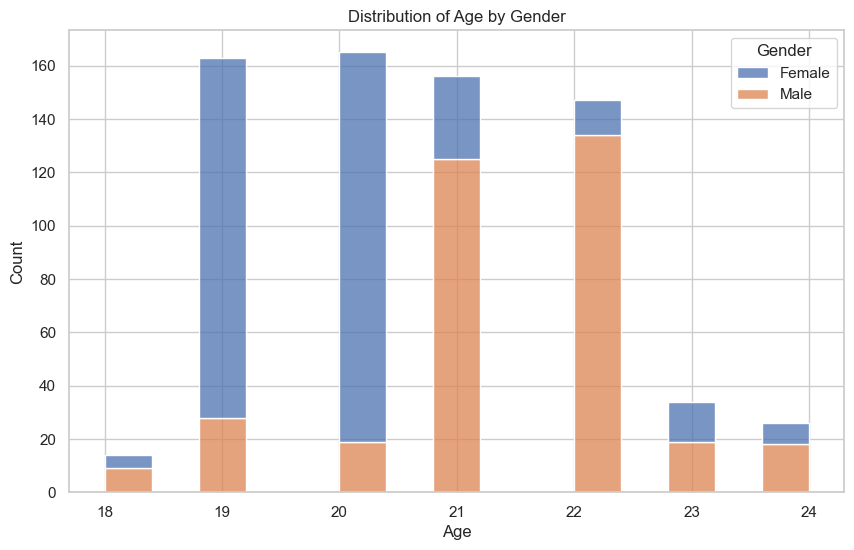

In [3]:
# Visual Theme
sns.set_theme(style="whitegrid")

print(pd.crosstab(df["Age"], df["Gender"], margins=True))

# Membuat figure dengan ukuran 10x6 inci
plt.figure(figsize=(10, 6))

# Membuat histogram dengan data umur yang dikelompokkan berdasarkan jenis kelamin
sns.histplot(data=df, x="Age", hue="Gender", multiple="stack", bins=15)

# Menambahkan judul grafik
plt.title("Distribution of Age by Gender")

# Menambahkan label sumbu x
plt.xlabel("Age")

# Menambahkan label sumbu y 
plt.ylabel("Count")

# Menampilkan grid pada grafik
plt.grid(True)

# Menampilkan grafik
plt.show()

---
### Analisis Distribusi Pengguna berdasarkan Negara

In [4]:
import plotly.express as px

# Menghitung jumlah pengguna per negara dan mereset index menjadi kolom baru
country_counts = df['Country'].value_counts().reset_index()

# Mengubah nama kolom menjadi 'Country' dan 'Count' agar lebih jelas
country_counts.columns = ['Country', 'Count']

# Membuat visualisasi peta choropleth
fig = px.choropleth(
    country_counts,                           # Data yang akan divisualisasikan
    locations='Country',                      # Kolom yang berisi nama negara
    locationmode='country names',             # Mode lokasi menggunakan nama negara
    color='Count',                            # Warna berdasarkan jumlah pengguna
    color_continuous_scale="Greens",          # Menggunakan skala warna hijau
    title='Distribution of Users by Country', # Judul visualisasi
)

# Menampilkan visualisasi peta
fig.show()

---
### Analisis Penggunaan Platform berdasarkan Jenis Kelamin

In [5]:
# Daftar platform yang akan dihapus dari analisis
drop_platforms = ['All','VKontakte', 'Snapchat', 'WeChat', 'LINE', 'KakaoTalk', 'LinkedIn']

# Membuat tabel silang platform vs gender dan menghapus platform yang tidak dianalisis
most_used_paltform_by_gender = pd.crosstab(df["Most_Used_Platform"], df["Gender"], margins=True).drop(drop_platforms, axis=0)

# Mengurutkan platform berdasarkan total pengguna (kolom 'All') dari terbesar ke terkecil
sorted_platforms = most_used_paltform_by_gender.sort_values(by='All', ascending=False)

print(sorted_platforms)

# Mencari platform yang paling banyak digunakan oleh pengguna wanita
top_female_platforms = most_used_paltform_by_gender['Female'].idxmax()
# Menghitung jumlah pengguna wanita pada platform tersebut
female_count = most_used_paltform_by_gender['Female'].max()

# Mencari platform yang paling banyak digunakan oleh pengguna pria
top_male_platforms = most_used_paltform_by_gender['Male'].idxmax()
# Menghitung jumlah pengguna pria pada platform tersebut
male_count = most_used_paltform_by_gender['Male'].max()

print("")
print(f"Cewek paling banyak menggunakan: {top_female_platforms} ({female_count} orang)")
print(f"Cowok paling banyak menggunakan: {top_male_platforms} ({male_count} orang)")

Gender              Female  Male  All
Most_Used_Platform                   
Instagram              172    77  249
TikTok                  86    68  154
Facebook                24    99  123
WhatsApp                11    43   54
Twitter                 16    14   30
YouTube                  0    10   10

Cewek paling banyak menggunakan: Instagram (172 orang)
Cowok paling banyak menggunakan: Facebook (99 orang)


---
### Visualisasi Platform berdasarkan Jenis Kelamin

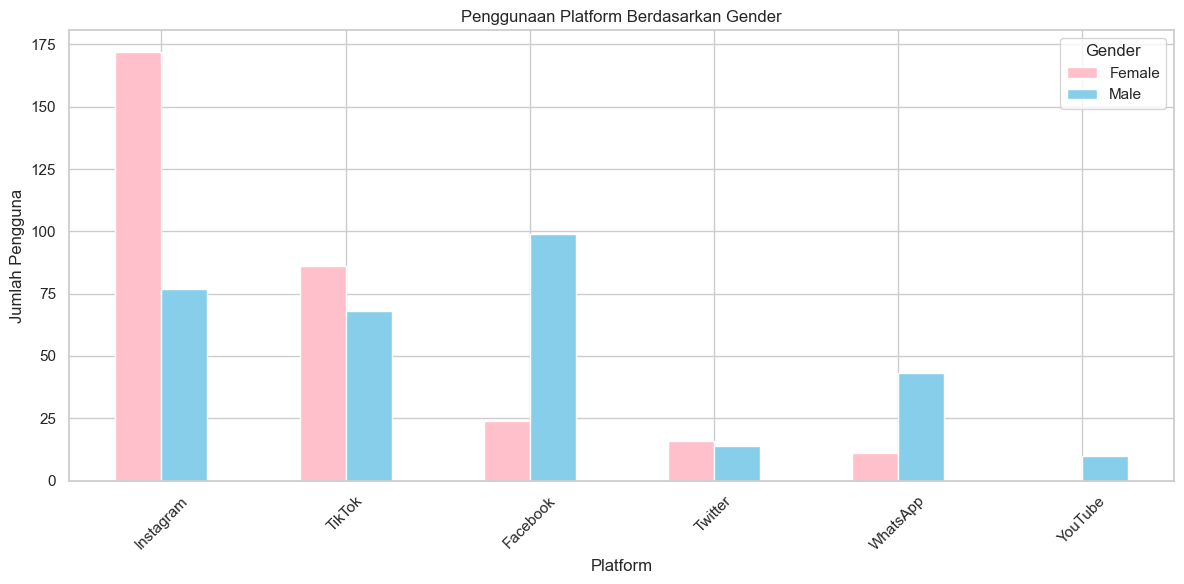

In [6]:
# Membuat dataframe baru dengan kolom Female dan Male, diurutkan berdasarkan jumlah pengguna wanita terbanyak
gender_platforms = most_used_paltform_by_gender[['Female', 'Male']].sort_values(by='Female', ascending=False)

# Membuat visualisasi bar chart dengan ukuran 12x6 inch
gender_platforms.plot(kind='bar', figsize=(12, 6), color=['pink', 'skyblue'])

# Menambahkan judul grafik
plt.title("Penggunaan Platform Berdasarkan Gender")

# Menambahkan label sumbu x
plt.xlabel("Platform")

# Menambahkan label sumbu y
plt.ylabel("Jumlah Pengguna")

# Memutar label platform 45 derajat agar lebih mudah dibaca
plt.xticks(rotation=45)

# Mengatur tata letak plot agar tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

## Model

In [7]:
print(df.dtypes)

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object


# Pre-Processing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [9]:
# Hapus nilai 'VKontakte', 'Snapchat', 'WeChat', 'LINE', 'KakaoTalk', 'LinkedIn' dari Most_Used_Platform
drop_platforms = ['All','VKontakte', 'Snapchat', 'WeChat', 'LINE', 'KakaoTalk']
df = df[~df['Most_Used_Platform'].isin(drop_platforms)]

# hapus fitur-fitur yang tidak digunakan dari df
df = df.drop(columns=['Student_ID', 'Academic_Level', 'Country', 'Affects_Academic_Performance', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Mental_Health_Score'])
X_Addicted_Score = df[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Most_Used_Platform']]
y_Addicted_Score = df['Addicted_Score']

# print(y_Addicted_Score.dtypes)
print(df.dtypes)

Age                        int64
Gender                    object
Avg_Daily_Usage_Hours    float64
Most_Used_Platform        object
Sleep_Hours_Per_Night    float64
Addicted_Score             int64
dtype: object


---
### Persiapan Data untuk Pemodelan

In [10]:
# Menghitung kuantil ke-99 dari skor kecanduan
q = df['Addicted_Score'].quantile(0.99)
# Menghapus data outlier dengan menyaring nilai di atas kuantil tersebut
X_Addicted_Score = df[df['Addicted_Score'] < q]

data_cleaned = X_Addicted_Score.reset_index(drop=True)

---
Transformasi dan Persiapan Fitur (X dan Y)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Buatkan pre processing log dari addicted score
data_cleaned['Addicted_Score_Log'] = np.log1p(data_cleaned['Addicted_Score'])


# Memisahkan fitur (X) dengan menghapus kolom target 'Addicted_Score' dan 'Addicted_Score_Log'
X = data_cleaned.drop(['Addicted_Score', 'Addicted_Score_Log'], axis=1)
# Mengambil kolom target yang sudah ditransformasi dengan log (y)
y = data_cleaned['Addicted_Score_Log']

print(y.dtypes)

# Identifikasi kolom kategorikal dan numerikal
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Buat preprocessor: OneHot untuk kategori, StandardScaler untuk numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Bikin pipeline dengan Linear Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

float64


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender', 'Most_Used_Platform'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

---
### Evaluasi Model

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prediksi
y_pred = model.predict(X_test)

#! Hitung metrik
# Menghitung Mean Squared Error (rata-rata kuadrat error)
mse = mean_squared_error(y_test, y_pred)
# Menghitung Root Mean Squared Error (akar dari MSE untuk mendapatkan error dalam skala asli)
rmse = np.sqrt(mse)
# Menghitung Mean Absolute Error (rata-rata nilai absolut error)
mae = mean_absolute_error(y_test, y_pred)
# Menghitung R² Score (seberapa baik model menjelaskan variansi data)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 0.00592904652353124
RMSE: 0.07700030210025958
MAE: 0.04906756029233531
R² Score: 0.8719716489770155


## Export Model (.sav) dengan Pickle

In [13]:
import os
import pickle

# Buat destinasi file export
filename = 'social_media_addected.sav'
save_path = 'models/{}'.format(filename)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

try:
    pickle.dump(model, open(save_path, 'wb'))
    print("✅ Model berhasil di export")
except Exception as e:
        print("⛔ Model gagal di export: ", e)

✅ Model berhasil di export
